# PCA
The Principle component Analysis allows to extract principal components which form a orthogonal basis where individual dimensions are linearly uncorrelated. This method is commonly used to dimensionality reduction. 

The dataset has a total of 952 features. We will see how many dimensions we can remove from the dataset to train simpler our model.

In [1]:
# all import
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np

from utils import *

In [2]:
%reload_kedro

2022-01-23 11:14:00,792 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-01-23 11:14:00,803 - kedro.framework.session.session - WARNING - Unable to git describe C:\local\arthur.viens\C7-MachineLearning\protein_function_prediction\proteins
2022-01-23 11:14:00,843 - root - INFO - ** Kedro project proteins
2022-01-23 11:14:00,846 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


C:\Users\arthur.viens\AppData\Roaming\Python\Python37\site-packages\kedro\framework\context\context.py:488: UserWarning: Credentials not found in your Kedro project config.
No files found in ['C:\\local\\arthur.viens\\C7-MachineLearning\\protein_function_prediction\\proteins\\conf\\base', 'C:\\local\\arthur.viens\\C7-MachineLearning\\protein_function_prediction\\proteins\\conf\\local'] matching the glob pattern(s): ['credentials*', 'credentials*/**', '**/credentials*']
  warn(f"Credentials not found in your Kedro project config.\n{str(exc)}")


In [9]:
X = catalog.load("raw_X_train")
y = catalog.load("raw_y_train")

2022-01-23 11:16:55,244 - kedro.io.data_catalog - INFO - Loading data from `raw_X_train` (PickleDataSet)...
2022-01-23 11:16:55,741 - kedro.io.data_catalog - INFO - Loading data from `raw_y_train` (PickleDataSet)...


We must scale our data to apply the PCA method because it based on the [Spectral Theorem](https://en.wikipedia.org/wiki/Spectral_theorem) which tells us to find principal components, data have to be scaled to be diagonalized in the algorithm.

In [4]:
X_scaled = scale(X)

In [7]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

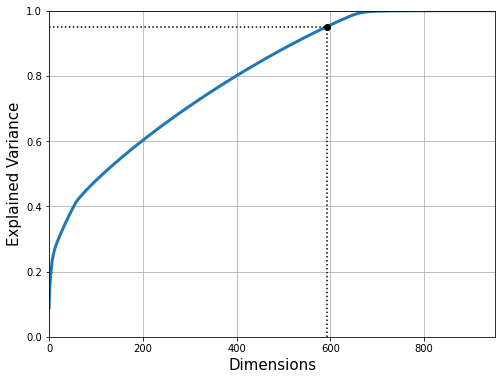

In [8]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
tol = 0.95
d = np.argmax(cumsum >= tol) + 1
plt.figure(figsize=(8, 6))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 952, 0, 1])
plt.xlabel("Dimensions", fontsize=15)
plt.ylabel("Explained Variance", fontsize=15)
plt.plot([d, d], [0, tol], "k:")
plt.plot([0, d], [tol, tol], "k:")
plt.plot(d, tol, "ko")
plt.grid(True)
plt.savefig("pca_reduction.png", dpi=120)
plt.show()

If we take a tolerance of 95%, that means we keep 95% of the information of our dataset, we have a little less 600 dimensions. In other words, we almost reduce dimensions by 37% !

Let's visualize the results of PCA !

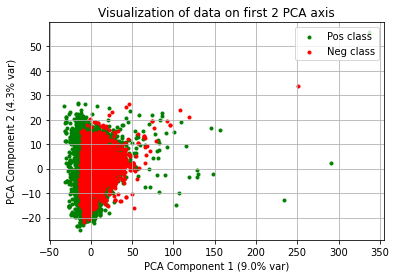

In [10]:
visualize_2d3d(X_pca, y, 2, pca)

Or alternatively, the T-SNE decomposition

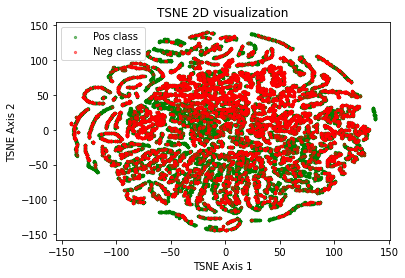

In [14]:
#visualize_tsne(X, y) # Takes a long time to compute ! 

from IPython.display import Image # Comment this and uncomment above to
Image(filename='tsne.png') # compute the T-SNE visualization